数据框（DataFrame）是一种矩阵形式的数据结构，但数据框中<font color=red>各列可以是不同类型的数据</font >。数据框每列是一个变量，每行是一个观测或称为记录。

# 数据框的创建

## 手工创建
--由多个向量创建

In [1]:
x <- c(1, 1, 2, 2, 3, 3, 3)
y <- c("女", "男", "男", "女", "女", "女", "男")
z <- c(80, 85, 92, 76, 61, 95, 83)
(student <- data.frame(x, y, z))
#请观察各列的类型

x,y,z
<dbl>,<chr>,<dbl>
1,女,80
1,男,85
2,男,92
2,女,76
3,女,61
3,女,95
3,男,83


In [2]:
dim(student)   #行列数

[1] 7 3

In [3]:
ncol(student)

[1] 3

In [4]:
(student <- data.frame(class=x,gender=y,score=z))  #对列名进行重新命名

class,gender,score
<dbl>,<chr>,<dbl>
1,女,80
1,男,85
2,男,92
2,女,76
3,女,61
3,女,95
3,男,83


In [5]:
nrow(student)

[1] 7

In [6]:
row.names(student) <- c("王x","张x","赵x","刘x","黄x","孙x","李x") #对数据框的行名进行修改
student

,class,gender,score
,<dbl>,<chr>,<dbl>
王x,1,女,80
张x,1,男,85
赵x,2,男,92
刘x,2,女,76
黄x,3,女,61
孙x,3,女,95
李x,3,男,83


创建空数据框--用于后期(逐行)添加数据

In [91]:
df <- data.frame(matrix(ncol = 3, nrow = 0))  #先创建一个空矩阵
colnames(df) <- c('ID', 'name', 'score')        #再赋予列名
df

ID,name,score
<lgl>,<lgl>,<lgl>


## 读取文件创建

最基本函数是read.table()---读取一个表格形式的文件，并创建一个相应的数据框。

read.table(file, header = FALSE, sep = "", quote = "\"'", dec = ".", skip = 0, strip.white = FALSE, blank.lines.skip = TRUE, comment.char = "#")

- file表示要读取的文件。file可以是绝对路径或者相对路径，但是一定要注意，因为在R语言中\是转义符，**所以路径分隔符必须写成\\\或者/**，比如“C:\\\myfile\\\myfile.csv”.或者“C:/myfile/myfile.csv”
- <font color=red>使用file.choose()，弹出对话框，让你选择文件位置。强烈推荐使用此种方法，免去了记忆和书写文件路径的麻烦，特别是能够避免因数据文件位置移动带来的错误！例如：read.table(file.choose(),...).</font>
- sep指定分隔符，**默认是空格**，若读取csv文件，则必须设置成逗号，才能以逗号为分割形成数据框！
- quote是引号，默认就是双引号。用于指定包围字符型数据的字符
- dec是小数点的表示，默认就是一个点。
- skip是确定是否跳过某些行。strip.white确定是否消除空白字符。blank.lines.skip确定是否跳过空白行。
- strip.white：逻辑值，默认为FALSE。此参数只在指定了sep参数时有效。当此参数设置为TRUE时，数据文件中没有包围的字符串域的前边和后边的空格将会被去掉。
- header来确定数据文件中第一行是不是标题。默认F，即认为数据文件没有标题，也即认为第一行就开始是数据了！

In [7]:
read.table(file.choose())   #图形方式读取---当前文件夹下的文件“s森林数据.txt”

V1,V2,V3,V4,V5,V6,V7,V8,V9
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
X,Y,month,day,temp,RH,wind,rain,area
1,2,aug,fri,14.7,66,2.7,0,0
1,2,aug,fri,18.5,73,8.5,0,0
1,2,aug,fri,25.9,41,3.6,0,0
1,2,aug,sat,25.9,32,3.1,0,0
1,2,aug,sun,19.5,39,6.3,0,0
1,2,aug,sun,17.9,44,2.2,0,0
1,2,aug,thu,20.2,45,3.6,0,0
1,2,aug,thu,26.7,35,1.8,0,5.8


In [8]:
read.table("s森林数据.txt")   #直接读取---当前文件夹下的文件“s森林数据.txt”，注意其间隔符号

V1,V2,V3,V4,V5,V6,V7,V8,V9
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
X,Y,month,day,temp,RH,wind,rain,area
1,2,aug,fri,14.7,66,2.7,0,0
1,2,aug,fri,18.5,73,8.5,0,0
1,2,aug,fri,25.9,41,3.6,0,0
1,2,aug,sat,25.9,32,3.1,0,0
1,2,aug,sun,19.5,39,6.3,0,0
1,2,aug,sun,17.9,44,2.2,0,0
1,2,aug,thu,20.2,45,3.6,0,0
1,2,aug,thu,26.7,35,1.8,0,5.8


In [9]:
read.table("s森林数据.txt", header = TRUE)   #其数据自带了题头

X,Y,month,day,temp,RH,wind,rain,area
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2,aug,fri,14.7,66,2.7,0,0.00
1,2,aug,fri,18.5,73,8.5,0,0.00
1,2,aug,fri,25.9,41,3.6,0,0.00
1,2,aug,sat,25.9,32,3.1,0,0.00
1,2,aug,sun,19.5,39,6.3,0,0.00
1,2,aug,sun,17.9,44,2.2,0,0.00
1,2,aug,thu,20.2,45,3.6,0,0.00
1,2,aug,thu,26.7,35,1.8,0,5.80
1,2,aug,tue,21.6,19,6.7,0,0.00


使用read.csv()读取一个文本文件，返回的也是一个Data Frame对象。

In [10]:
(data <- read.csv("input.csv"))
class(data)

id,name,salary,start_date,dept
<int>,<chr>,<dbl>,<chr>,<chr>
1,Rick,623.30,2012-01-01,IT
2,Dan,515.20,2013-09-23,Operations
3,Michelle,611.00,2014-11-15,IT
4,Ryan,729.00,2014-05-11,HR
NA,Gary,843.25,2015-03-27,Finance
6,Nina,578.00,2013-05-21,IT
7,Simon,632.80,2013-07-30,Operations
8,Guru,722.50,2014-06-17,Finance


[1] "data.frame"

# 数据框的存储
--写入硬盘

In [11]:
x <- c(1, 1, 2, 2, 3, 3, 3)
y <- c("女", "男", "男", "女", "女", "女", "男")
z <- c(80, 85, 92, 76, 61, 95, 83)
(student <- data.frame(x, y, z))

x,y,z
<dbl>,<chr>,<dbl>
1,女,80
1,男,85
2,男,92
2,女,76
3,女,61
3,女,95
3,男,83


In [12]:
write.csv(student,"output.csv")    #以csv格式存储到当前文件夹

# 数据框的引用

## 引用列

In [13]:
x <- c(1, 1, 2, 2, 3, 3, 3)
y <- c("女", "男", "男", "女", "女", "女", "男")
z <- c(80, 85, 92, 76, 61, 95, 83)
(student <- data.frame(class=x, gender=y, score=z))  #对列名进行重新命名

class,gender,score
<dbl>,<chr>,<dbl>
1,女,80
1,男,85
2,男,92
2,女,76
3,女,61
3,女,95
3,男,83


In [14]:
student[,"score"]     #返回student的score列

[1] 80 85 92 76 61 95 83

In [15]:
student$score    #返回student的score列，更简单

[1] 80 85 92 76 61 95 83

In [16]:
class(student[,"score"])

[1] "numeric"

In [17]:
class(student$score)

[1] "numeric"

In [18]:
student[,3]

[1] 80 85 92 76 61 95 83

In [19]:
class(student[,3])

[1] "numeric"

In [20]:
student[3]     #不要前边的“,”，注意返回的类型

score
<dbl>
80
85
92
76
61
95
83


In [21]:
class(student[3])

[1] "data.frame"

In [22]:
student[,c(1,3)]    #引用第1和第3列

class,score
<dbl>,<dbl>
1,80
1,85
2,92
2,76
3,61
3,95
3,83


In [23]:
student[c(1,3)]    #引用第1和第3列，省略掉前边的“,”亦可以--注意！！！

class,score
<dbl>,<dbl>
1,80
1,85
2,92
2,76
3,61
3,95
3,83


##### 如果方括号内只有一个元素，引用的是“列”

In [24]:
student[-2]    #去除第2列

class,score
<dbl>,<dbl>
1,80
1,85
2,92
2,76
3,61
3,95
3,83


In [25]:
student[-c(1,2)]    #去除第1,2列

score
<dbl>
80
85
92
76
61
95
83


In [26]:
student[c(T,F,T)]    #使用逻辑向量

class,score
<dbl>,<dbl>
1,80
1,85
2,92
2,76
3,61
3,95
3,83


In [27]:
student[1,3]    #引用第1行的第3列

[1] 80

In [28]:
class(student[,c(1,3)])

[1] "data.frame"

## 引用行

In [29]:
x <- c(1, 1, 2, 2, 3, 3, 3)
y <- c("女", "男", "男", "女", "女", "女", "男")
z <- c(80, 85, 92, 76, 61, 95, 83)
(student <- data.frame(class=x, gender=y, score=z))  #对列名进行重新命名

class,gender,score
<dbl>,<chr>,<dbl>
1,女,80
1,男,85
2,男,92
2,女,76
3,女,61
3,女,95
3,男,83


In [30]:
student[1:5,]   #引用连续行

,class,gender,score
,<dbl>,<chr>,<dbl>
1,1,女,80
2,1,男,85
3,2,男,92
4,2,女,76
5,3,女,61


In [31]:
student[c(1,5),]   #引用某些行

,class,gender,score
,<dbl>,<chr>,<dbl>
1,1,女,80
5,3,女,61


In [32]:
class(student[c(1,5),] )

[1] "data.frame"

## 引用某些行、列

In [33]:
x <- c(1, 1, 2, 2, 3, 3, 3)
y <- c("女", "男", "男", "女", "女", "女", "男")
z <- c(80, 85, 92, 76, 61, 95, 83)
(student <- data.frame(class=x, gender=y, score=z))  #对列名进行重新命名

class,gender,score
<dbl>,<chr>,<dbl>
1,女,80
1,男,85
2,男,92
2,女,76
3,女,61
3,女,95
3,男,83


In [34]:
student[1:5, 1:3] # 引用连续的行、列

,class,gender,score
,<dbl>,<chr>,<dbl>
1,1,女,80
2,1,男,85
3,2,男,92
4,2,女,76
5,3,女,61


In [35]:
class(student[1:5, 1:3])  

[1] "data.frame"

In [36]:
student[c(1,5), c(1,3)] #引用不连续的行、列

,class,score
,<dbl>,<dbl>
1,1,80
5,3,61


In [37]:
student[student$score > 80, ] # 筛选出符合条件的数据--成绩大于80分的学生

,class,gender,score
,<dbl>,<chr>,<dbl>
2,1,男,85
3,2,男,92
6,3,女,95
7,3,男,83


In [38]:
student[student$score>80 & student$sex=="女", ]

class,gender,score
<dbl>,<chr>,<dbl>


## 数据框绑定
--attach()函数

In [39]:
x <- c(1, 1, 2, 2, 3, 3, 3)
y <- c("女", "男", "男", "女", "女", "女", "男")
z <- c(80, 85, 92, 76, 61, 95, 83)
(student <- data.frame(class=x, gender=y, score=z))  #对列名进行重新命名

class,gender,score
<dbl>,<chr>,<dbl>
1,女,80
1,男,85
2,男,92
2,女,76
3,女,61
3,女,95
3,男,83


In [40]:
score   #不能直接引用数据框中的列

ERROR: Error in eval(expr, envir, enclos): object 'score' not found


In [41]:
student$score   #每次都要附上数据框的名，很麻烦

[1] 80 85 92 76 61 95 83

In [42]:
attach(student)    #绑定后，就可以直接引用其中的列了

In [43]:
score

[1] 80 85 92 76 61 95 83

In [44]:
gender

[1] "女" "男" "男" "女" "女" "女" "男"

In [45]:
detach()    #解绑后，就不能直接引用其中的列了

In [46]:
score    #只能在attach与detach围成的区域内直接访问

ERROR: Error in eval(expr, envir, enclos): object 'score' not found


## 创建局部引用环境
--with函数

{ }内是局部环境，所创建的对象均为局部对象，在{ }内可以访问，在{ }外不能访问。

如果要引用的仅有一条语句（例如 summary(mpg) ），那么花括号 { } 可以省略

In [47]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.40   15.43   19.20   20.09   22.80   33.90 


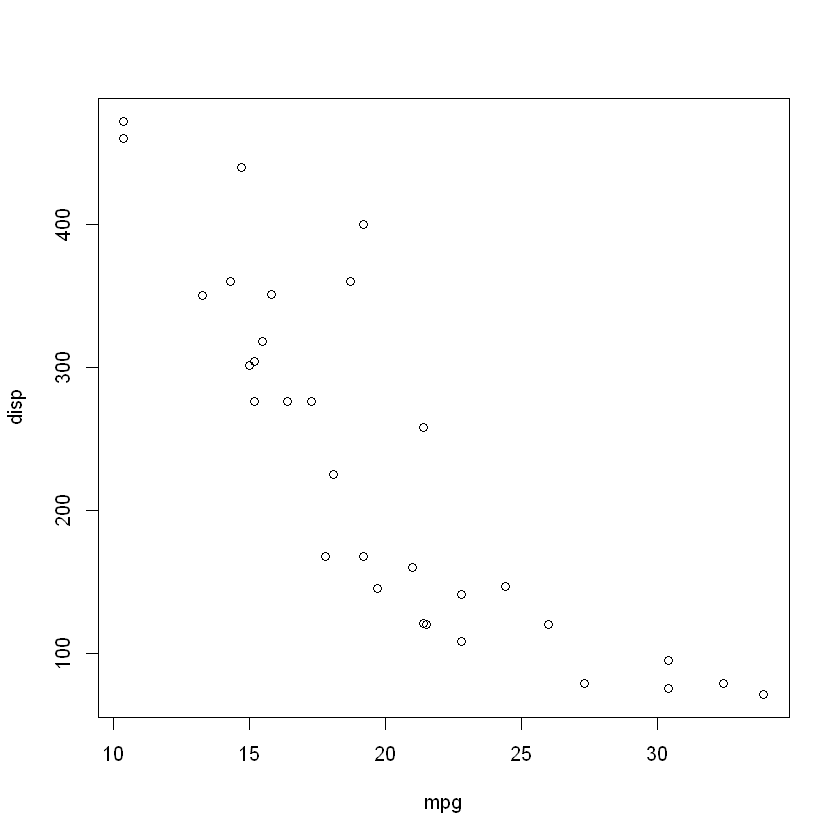

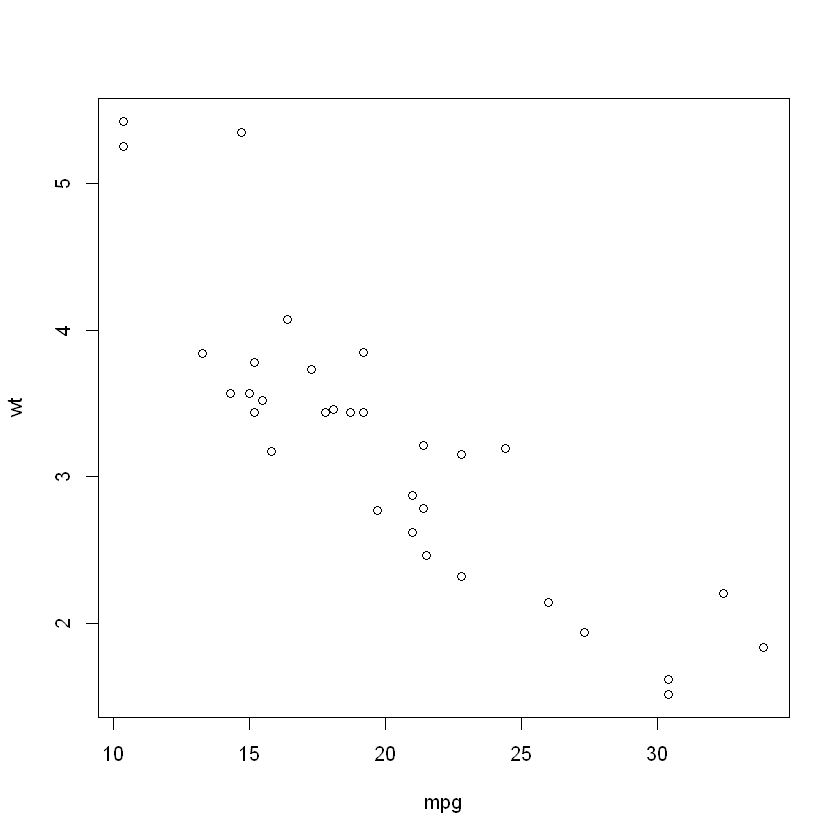

In [48]:
with(mtcars, { 
  print(summary(mpg)) 
  plot(mpg, disp) 
  plot(mpg, wt) 
}) 

In [49]:
print(summary(mpg))    #不在局部环境内，不能直接引用数据框的列

ERROR: Error in eval(expr, envir, enclos): object 'mpg' not found


### 依据不同列进行排序

In [50]:
dd <- data.frame(
  x = c("D", "A", "C", "A"), 
  y = c(8, 3, 9, 9),
  z = c(1, 1, 3, 2)
)
dd

x,y,z
<chr>,<dbl>,<dbl>
D,8,1
A,3,1
C,9,3
A,9,2


In [51]:
(with(dd, order(z)))   #z列升序行号
dd[with(dd, order(z)), ]
dd        #观察原数据有无改变---无改变

[1] 1 2 4 3

,x,y,z
,<chr>,<dbl>,<dbl>
1,D,8,1
2,A,3,1
4,A,9,2
3,C,9,3


x,y,z
<chr>,<dbl>,<dbl>
D,8,1
A,3,1
C,9,3
A,9,2


In [52]:
dd[with(dd, order(-z)), ]   #按z列降序排列

,x,y,z
,<chr>,<dbl>,<dbl>
3,C,9,3
4,A,9,2
1,D,8,1
2,A,3,1


In [53]:
dd[with(dd, order(-z, x)), ]  #按z列降序，x列升序排列

,x,y,z
,<chr>,<dbl>,<dbl>
3,C,9,3
4,A,9,2
2,A,3,1
1,D,8,1


In [56]:
dd[order(-dd[,3], dd[,1]), ]  #按照列号--第3列降序，第1列升序

,x,y,z
,<chr>,<dbl>,<dbl>
3,C,9,3
4,A,9,2
2,A,3,1
1,D,8,1


# 数据框新增一列

## 原地操作

In [57]:
dd$yz <- dd$y + dd$z     
dd

x,y,z,yz
<chr>,<dbl>,<dbl>,<dbl>
D,8,1,9
A,3,1,4
C,9,3,12
A,9,2,11


## 非原地操作
--transform函数

In [58]:
#创建数据框mydata，x1和x2是mydata的两个列向量
mydata <- data.frame(x1 = c(2, 2, 6, 4), x2 = c(3, 4, 2, 8))
mydata

x1,x2
<dbl>,<dbl>
2,3
2,4
6,2
4,8


In [59]:
#利用transform函数对数据框mydata增加两个变量（列向量）sumx和meanx，并把结果存储在数据框mydata中
mydata1 <- transform(mydata, sumx = x1 + x2, meanx = (x1 + x2)/2)
mydata1
mydata    #观察原数据有无改变

x1,x2,sumx,meanx
<dbl>,<dbl>,<dbl>,<dbl>
2,3,5,2.5
2,4,6,3.0
6,2,8,4.0
4,8,12,6.0


x1,x2
<dbl>,<dbl>
2,3
2,4
6,2
4,8


In [60]:
#利用within函数，expr表达式执行一条语句占一行，执行多条语句需要换行
mydata2 <- within(mydata, {sumx = x1 + x2
                         meanx = (x1 + x2)/2})
mydata2

x1,x2,meanx,sumx
<dbl>,<dbl>,<dbl>,<dbl>
2,3,2.5,5
2,4,3.0,6
6,2,4.0,8
4,8,6.0,12


In [61]:
#或者多条语句在同一行，则中间应当用分号;隔开
mydata3 <- within(mydata, {sumx = x1 + x2; meanx = (x1 + x2)/2})
mydata3

x1,x2,meanx,sumx
<dbl>,<dbl>,<dbl>,<dbl>
2,3,2.5,5
2,4,3.0,6
6,2,4.0,8
4,8,6.0,12


In [62]:
mydata4 <- with(mydata, {sumx = x1 + x2; meanx = (x1 + x2)/2})   #meanx未起作用且返回的不是dataframe
mydata4
print(class(mydata4))

[1] 2.5 3.0 4.0 6.0

[1] "numeric"


In [63]:
mydata     #自身未变

x1,x2
<dbl>,<dbl>
2,3
2,4
6,2
4,8


# 数据框横向合并

In [64]:
ID <- c(1, 2, 3, 4)
name <- c("Jim", "Tony", "Lisa", "Tom")
score <- c(89, 22, 78, 78)
(student1 <- data.frame(ID, name))
(student2 <- data.frame(ID, score))
total_student <- merge(student1, student2, by = "ID") # 或者rbind()
total_student

ID,name
<dbl>,<chr>
1,Jim
2,Tony
3,Lisa
4,Tom


ID,score
<dbl>,<dbl>
1,89
2,22
3,78
4,78


ID,name,score
<dbl>,<chr>,<dbl>
1,Jim,89
2,Tony,22
3,Lisa,78
4,Tom,78


# 使用 SQL 语句操作数据框

In [65]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [66]:
library(sqldf)
#从数据框mtcars中选择所有的变量（列），保留carb=1的行，按照mpg对车型进行升序排序，并将结果保存为数据框newdf。参数row.names=TRUE将原始数据框中的行名延续到了新数据框中 
newdf <- sqldf("select * from mtcars where carb=1 order by mpg", row.names=TRUE) 
newdf

Warning message:
"package 'sqldf' was built under R version 4.3.3"
Loading required package: gsubfn

Warning message:
"package 'gsubfn' was built under R version 4.3.3"
Loading required package: proto

Warning message:
"package 'proto' was built under R version 4.3.3"
Loading required package: RSQLite

Warning message:
"package 'RSQLite' was built under R version 4.3.3"


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


In [67]:
sqldf("select avg(mpg) as avg_mpg, avg(disp) as avg_disp, gear from mtcars where cyl in (4, 6) group by gear")    
#输出四缸和六缸车型每一gear水平的mpg和disp的平均值 

avg_mpg,avg_disp,gear
<dbl>,<dbl>,<dbl>
20.33333,201.0333,3
24.53333,123.0167,4
25.36667,120.1333,5


# 整合数据 

## 分组汇总
--aggregate(x, by, FUN)

根据汽缸数和挡位数整合 mtcars 数据，并返回各个数值型变量的均值

In [68]:
options(digits = 3)
attach(mtcars)
aggdata <- aggregate(mtcars, by = list(cyl, gear), FUN = mean, na.rm = TRUE)
aggdata

Group.1,Group.2,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,3,21.5,4,120,97,3.70,2.46,20.0,1.0,0.00,3,1.00
6,3,19.8,6,242,108,2.92,3.34,19.8,1.0,0.00,3,1.00
8,3,15.1,8,358,194,3.12,4.10,17.1,0.0,0.00,3,3.08
4,4,26.9,4,103,76,4.11,2.38,19.6,1.0,0.75,4,1.50
6,4,19.8,6,164,116,3.91,3.09,17.7,0.5,0.50,4,4.00
4,5,28.2,4,108,102,4.10,1.83,16.8,0.5,1.00,5,2.00
6,5,19.7,6,145,175,3.62,2.77,15.5,0.0,1.00,5,6.00
8,5,15.4,8,326,300,3.88,3.37,14.6,0.0,1.00,5,6.00


## 按照指定字段分组
--split函数

In [69]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.62,16.5,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.88,17.0,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.6,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.21,19.4,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.0,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.46,20.2,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.57,15.8,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.19,20.0,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2


In [70]:
a=split(mtcars,mtcars$gear)
a

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hornet 4 Drive,21.4,6,258,110,3.08,3.21,19.4,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.0,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.46,20.2,1,0,3,1
Duster 360,14.3,8,360,245,3.21,3.57,15.8,0,0,3,4
Merc 450SE,16.4,8,276,180,3.07,4.07,17.4,0,0,3,3
Merc 450SL,17.3,8,276,180,3.07,3.73,17.6,0,0,3,3
Merc 450SLC,15.2,8,276,180,3.07,3.78,18.0,0,0,3,3
Cadillac Fleetwood,10.4,8,472,205,2.93,5.25,18.0,0,0,3,4
Lincoln Continental,10.4,8,460,215,3.00,5.42,17.8,0,0,3,4


In [71]:
class(a)

[1] "list"

## 重构和整合数据集的万能工具 
--reshape 包/reshape2 包

In [72]:
ID <- c(1,1,2,2) 
Time <- c(1,2,1,2) 
X1 <- c(5,3,6,2) 
X2 <- c(6,5,1,4) 
(mydata <- data.frame(ID,Time,X1,X2))

ID,Time,X1,X2
<dbl>,<dbl>,<dbl>,<dbl>
1,1,5,6
1,2,3,5
2,1,6,1
2,2,2,4


In [73]:
library(reshape) 
(md <- melt(mydata, id=c("ID", "Time")))  #将 mydata 按 ID 和 Time（为key） 融合，将结果保存在 md 中

Warning message:
"package 'reshape' was built under R version 4.3.3"


ID,Time,variable,value
<dbl>,<dbl>,<fct>,<dbl>
1,1,X1,5
1,2,X1,3
2,1,X1,6
2,2,X1,2
1,1,X2,6
1,2,X2,5
2,1,X2,1
2,2,X2,4


In [74]:
cast(md, ID ~ variable, mean) # 重塑并整合 md，求每个ID该variable 的均值
#“~”前边是索引列的取值，后边是抬头后续列的取值，函数是成组元素的处理

,ID,X1,X2
,<dbl>,<dbl>,<dbl>
1,1,4,5.5
2,2,4,2.5


In [75]:
cast(md, Time ~ variable, mean) # 重塑并整合 md，求每个Time该variable均值

,Time,X1,X2
,<dbl>,<dbl>,<dbl>
1,1,5.5,3.5
2,2,2.5,4.5


In [76]:
cast(md, ID ~ Time, mean) # 重塑并整合 md，求每个 ID 该Time平均值

,ID,1,2
,<dbl>,<dbl>,<dbl>
1,1,5.5,4
2,2,3.5,3


In [77]:
cast(md, ID + Time ~ variable)
#重塑 md，得到每个 ID 在不同 Time 中对应的 variable（X1 和X2）值（即 ID 为一级行标签，Time 为二级行标签，variable 是列变量）

,ID,Time,X1,X2
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,5,6
2,1,2,3,5
3,2,1,6,1
4,2,2,2,4


In [78]:
(md <- melt(mydata, id = c("ID", "Time")))  #便于以下对照

ID,Time,variable,value
<dbl>,<dbl>,<fct>,<dbl>
1,1,X1,5
1,2,X1,3
2,1,X1,6
2,2,X1,2
1,1,X2,6
1,2,X2,5
2,1,X2,1
2,2,X2,4


In [79]:
cast(md, ID + variable ~ Time)
#重塑 md，得到每个 ID 在不同 variable 中对应的 Time 值（即ID 为一级行标签，variable 为二级行标签，Time 是列变量）

,ID,variable,1,2
,<dbl>,<fct>,<dbl>,<dbl>
1,1,X1,5,3
2,1,X2,6,5
3,2,X1,6,2
4,2,X2,1,4


In [80]:
cast(md, ID ~ variable + Time)
#重塑 md，得到每个 ID 的 X1 和 X2 在不同 Time 中的值是多少（即 ID 为行标签，variable 和 Time 是列变量）

,ID,X1_1,X1_2,X2_1,X2_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,5,3,6,5
2,2,6,2,1,4


**如果觉得上面的示例的演示不够直观，可以尝试下面这个例子：** 

已知：a 和 b 参加了在 2017 年和 2018 年分别组织的 3 次考试，取得了 math 和 english 的成绩。 

In [81]:
name <- c("a", "a", "a", "a", "a", "a", "b", "b", "b", "b", "b", "b")
year <- c(2017, 2017, 2017, 2018, 2018, 2018, 2017, 2017, 2017, 2018, 2018, 2018)
test <- c(1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3)
math <- c(1, 5, 8, 6, 4, 2, 7, 8, 5, 4, 6, 7)
english <- c(2, 9, 8, 5, 3, 2, 7, 1, 4, 9, 5, 7)
(mydata <- data.frame(name, year, test, math, english))

name,year,test,math,english
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
a,2017,1,1,2
a,2017,2,5,9
a,2017,3,8,8
a,2018,1,6,5
a,2018,2,4,3
a,2018,3,2,2
b,2017,1,7,7
b,2017,2,8,1
b,2017,3,5,4


In [82]:
nrow(mydata)

[1] 12

In [83]:
library(reshape)
md <- melt(mydata, id = (c("name", "year", "test"))) # 融合 mydata，保存在 md 中
md

name,year,test,variable,value
<chr>,<dbl>,<dbl>,<fct>,<dbl>
a,2017,1,math,1
a,2017,2,math,5
a,2017,3,math,8
a,2018,1,math,6
a,2018,2,math,4
a,2018,3,math,2
b,2017,1,math,7
b,2017,2,math,8
b,2017,3,math,5


In [84]:
nrow(md)

[1] 24

In [85]:
cast(md, year ~ variable, mean) # 重塑并整合 mydata，求每年 math 和 english 的平均分

,year,math,english
,<dbl>,<dbl>,<dbl>
1,2017,5.67,5.17
2,2018,4.83,5.17


In [86]:
cast(md, name + year ~ variable, sum) # 重塑并整合 mydata，求每人每年 math 和 english 的总分

,name,year,math,english
,<chr>,<dbl>,<dbl>,<dbl>
1,a,2017,14,19
2,a,2018,12,10
3,b,2017,20,12
4,b,2018,17,21


In [87]:
cast(md, name ~ year + test, sum) # 重塑并整合 mydata，求每人（行标签）在每年每次考试（列标签）中的总分

,name,2017_1,2017_2,2017_3,2018_1,2018_2,2018_3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,a,3,14,16,11,7,4
2,b,14,9,9,13,11,14


In [88]:
cast(md, name ~ year + test + variable) # 重塑 mydata，得到每人（行标签）在每年每次考试（列标签）中的分数

,name,2017_1_math,2017_1_english,2017_2_math,2017_2_english,2017_3_math,2017_3_english,2018_1_math,2018_1_english,2018_2_math,2018_2_english,2018_3_math,2018_3_english
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,a,1,2,5,9,8,8,6,5,4,3,2,2
2,b,7,7,8,1,5,4,4,9,6,5,7,7


In [89]:
cast(md, year + test ~ name + variable) # 重塑 mydata，得到每年每次（行标签）每人每次考试（列标签）的分数

,year,test,a_math,a_english,b_math,b_english
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2017,1,1,2,7,7
2,2017,2,5,9,8,1
3,2017,3,8,8,5,4
4,2018,1,6,5,4,9
5,2018,2,4,3,6,5
6,2018,3,2,2,7,7
